# 2 퍼셉트론
퍼셉트론(perceptron) 알고리즘

프랑크 로젠브라크(Frank Rosenblatt)가 1957년 고안한 알고리즘

신경망(딥러닝)의 기원이 되는 알고리즘

## 2.1 퍼셉트론이란?
퍼셉트론(인공뉴런): 다수의 신호를 입력으로 받아 하나의 신호를 출력

신호: 흐른다(1), 흐르지 않는다(0) 두 가지 값을 가짐.

입력신호: x1, x2

출력신호: y

가중치: w1, w2(w는 weight의 머리글자) 

퍼셉트론에서는 가중치가 클수록 강한 신호를 흘림.

전류에서 말하는 저항. 저항이 낮을 수록 큰 전류가 흐름.

뉴런, 노드: x1, x2, y

입력신호가 뉴런에 보내질 때 가각 고유한 가중치가 곱해짐. (w1x1, w2x2)

뉴런이 활성화: 뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력

임계값: 정해진 한계. 세타 기호로 표현

\begin{equation*}
y = 0 (w_1 x_1 + w_2 x_2 <= theta)
\end{equation*}
\begin{equation*}
y = 1 (w_1 x_1 + w_2 x_2 > theta)
\end{equation*}

## 2.2 단순한 논리 회로

### 2.2.1 AND 게이트

진리표: 입력 신호와 출력 신호의 대응표

AND 게이트 진리표

| x1 | x2 | x3 |
|----|----|----|
|  0 |  0 |  0 |
|  1 |  0 |  0 |
|  0 |  1 |  0 |
|  1 |  1 |  1 |

퍼셉트론으로 표현하려면 진리표대로 작동하는 w1, w1, 세타 값을 정해야 함

(w1, w2, 세타) = (0.5, 0.5, 0.7), (0.5, 0.5, 0.8) 또는 (1.0, 1.0, 1.0)

x1, x2가 모두 1일 때만 가중신호의 총합이 주어진 임계값을 넘게 됨.

### 2.2.2 NAND 게이트와 OR 게이트
NAND = not AND. AND 게이트의 출력을 뒤집은 것.

NAND 게이트 진리표

| x1 | x2 | x3 |
|----|----|----|
|  0 |  0 |  1 |
|  1 |  0 |  1 |
|  0 |  1 |  1 |
|  1 |  1 |  0 |

AND 게이트를 구현하는 매개변수의 부호를 모두 반전하면 NAND 게이트가 됨

OR 게이트 진리표

| x1 | x2 | x3 |
|----|----|----|
|  0 |  0 |  0 |
|  1 |  0 |  1 |
|  0 |  1 |  1 |
|  1 |  1 |  1 |

각 게이트에 대한 퍼셉트론의 구조는 모두 같음

차이점은 매개변수(가중치와 임계값)

퍼셉트론의 매개변수 값

기계학습 문제는 매개변수(가중치와 임계값)을 정하는 작업을 컴퓨터가 자동으로 함

학습: 적절한 매개변수를 정하는 작업

사람은 퍼셉트론의 구조(모델)를 고민하고 컴퓨터에 학습할 데이터를 제공.

## 2.3 퍼셉트론 구현하기

### 2.3.1 간단한 구현부터

x1, x2를 인수로 받는 AND라는 함수

In [1]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [2]:
print(AND(0, 0)) # 0을 출력
print(AND(1, 0)) # 0을 출력
print(AND(0, 1)) # 0을 출력
print(AND(1, 1)) # 1을 출력

0
0
0
1


### 2.3.2 가중치와 편향 도입
세타를 -b로 치환하면 다음처럼 퍼셉트론 동작이 변경됨

b를 편향(bias)라고 함

\begin{equation*}
y = 0 (b + w_1 x_1 + w_2 x_2 <= 0)
\end{equation*}
\begin{equation*}
y = 1 (b + w_1 x_1 + w_2 x_2 > 0)
\end{equation*}

넘파이를 사용해서 위의 식을 구현

In [3]:
import numpy as np
x = np.array([0, 1])     # 입력
w = np.array([0.5, 0.5]) # 가중치
b = -0.7                 # 편향
w*x

array([ 0. ,  0.5])

In [4]:
np.sum(w*x)

0.5

In [5]:
np.sum(w*x) + b

-0.19999999999999996

### 2.3.3 가중치와 편향 구현하기
'가중치와 편향을 도입'한 AND 게이트 구현

In [6]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

가중치(w1, w2)는 각 입력 신호가 결과에 주는 영향력(중요도)을 조절하는 매개변수

편향(b)은 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조정하는 매개변수

예시) b가 -0.1이면 가중치를 곱한 합이 0.1을 초과할 때 뉴런이 활성화.

편향의 의미: 한 쪽으로 치우쳐 균형을 깬다.

NAND 게이트와 OR 게이트 구현

In [7]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) # AND와는 가중치(w와 b)만 다르다.
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) # AND와는 가중치(w와 b)만 다르다.
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

## 2.4 퍼셉트론의 한계

### 2.4.1 도전! XOR 게이트
XOR 게이트 배타적 논리합. x1과 x2 한쪽이 1일 때만 1을 출력. (배타적이란 자기 외에는 거부한다는 의미)

XOR 게이트 진리표

| x1 | x2 | x3 |
|----|----|----|
|  0 |  0 |  0 |
|  1 |  0 |  1 |
|  0 |  1 |  1 |
|  1 |  1 |  0 |

지금까지 본 퍼셉트론은 XOR 게이트를 구현할 수 없음.

(b, w1, w2) = (-0.5, 1.0, 1.0)일 때 OR 게이트 퍼셉트론 식

\begin{equation*}
y = 0 (-0.5 + x_1 + x_2 <= 0)
\end{equation*}
\begin{equation*}
y = 1 (-0.5 + x_1 + x_2 > 0)
\end{equation*}

퍼셉트론의 시각화: 회색 영역은 0을 출력하는 영역. 전체 영역을 OR 게이트 성질을 만족

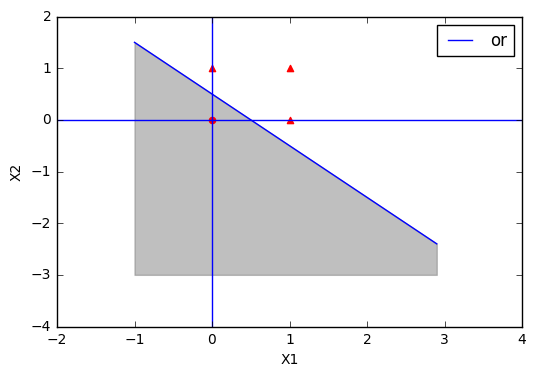

In [8]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

x1 = np.arange(-1, 3, 0.1)
x2 = -x1 + 0.5

plt.axvline(x=0, color = 'b')  # draw x =0 axes
plt.axhline(y=0, color = 'b')   # draw y =0 axes

# 그래프 그리기
plt.plot(x1, x2, label="or")
plt.xlabel("X1") # x축 이름
plt.ylabel("X2") # y축 이름
plt.legend()

plt.fill_between(x1, x2, -3, color='grey', alpha='0.5')

plt.scatter([0],[0],marker='o',color='r')
plt.scatter([1,0,1],[0,1,1],marker='^',color='r')
plt.show()

OR 게이트는 (x1,x2)=(0,0)일 때 0을 출력(원으로 표시). (0,1),(1,0),(1,1)일 때 1을 출력(세모로 표시)

XOR 게이트를 직선 하나로 0과 1을 나누는 영역을 만들 수 있을까?

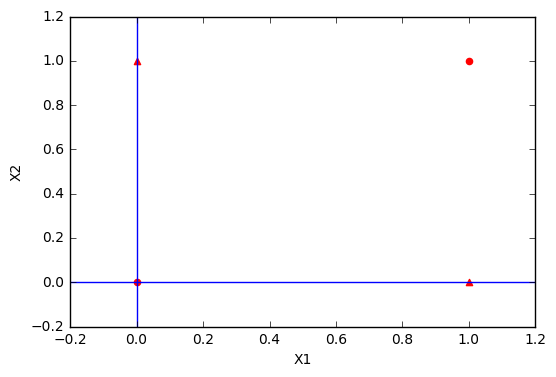

In [9]:
x1 = np.arange(-1, 3, 0.1)
x2 = -x1 + 0.5

plt.axvline(x=0, color = 'b')  # draw x =0 axes
plt.axhline(y=0, color = 'b')   # draw y =0 axes
plt.xlabel("X1") # x축 이름
plt.ylabel("X2") # y축 이름

plt.scatter([0,1],[0,1],marker='o',color='r')
plt.scatter([1,0],[0,1],marker='^',color='r')
plt.show()

0과 1을 직선 하나로 나누는 것이 불가능.

### 2.4.2 선형과 비선형
'직선'이란 제약을 없애면 둘을 나눌 수 있음.

![title](XOR.png)

위와 같은 곡선의 영역을 비선형 영역.

직선의 영역을 선형 영역이라함.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
img = imread('XOR.png')

## 2.5 다층 퍼셉트론이 출동한다면
단층 퍼셉트론(single-layer perceptron)으로는 XOR 게이트를 표현할 수 없다. 혹은 비선형 영역을 분리할 수 없다.

다중 퍼셉트론(multi-layer perceptron): 퍼셉트론의 층을 쌓음

XOR을 층을 하나 더 쌓아서 표현

### 2.5.1 기존 게이트 조합하기
XOR게이트를 만드는 방법은 다양. 

AND, NAND, OR 게이트를 조합하는 방법

**게이트기호 설명**

![title](gates.JPG)

**AND, NAND, OR 게이트를 조합해 구현한 XOR 게이트**

![title](xor.PNG)

**XOR 게이트의 진리표**

| x1 | x2 | s1 | s2 | y |
|----|----|----|----|---|
|  0 |  0 |  1 |  0 | 0 |
|  1 |  0 |  1 |  1 | 1 |
|  0 |  1 |  1 |  1 | 1 |
|  1 |  1 |  0 |  1 | 0 |

### 2.5.2 XOR 게이트 구현하기
XOR 게이트의 진리표대로 조랍된 XOR 게이트를 파이썬으로 구현 

In [10]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [11]:
print(XOR(0, 0)) # 0을 출력
print(XOR(1, 0)) # 1을 출력
print(XOR(0, 1)) # 1을 출력
print(XOR(1, 1)) # 0을 출력

0
1
1
0


XOR을 퍼셉트론으로 표현
![title](layers.PNG)

AND, OR는 단층 퍼셉트론

XOR은 2층 퍼셉트론

2층 퍼셉트론 서술

* 0층의 두 뉴런이 입력신호를 받아 1층의 뉴런으로 신호를 보냄
* 1층의 뉴런이 2층의 뉴런으로 신호를 보내고 2층의 뉴런은 이 입력신호를 바탕으로 y를 출력

작업자(뉴런)들 사이에서 부품을 전달

단층 퍼셉트론으로는 표현하지 못한 것을 층을 하나 늘려 구현 가능

## 2.6 NAND에서 컴퓨터까지
NAND게이트의 조합만으로 컴퓨터가 수행하는 일을 재현 가능

The Elements of Computing Systems: Building a Modern Computer from First Priciples 도서 참고

"NAND에서 테트리스까지"라는 구호 아래 테트리스가 작동하는 컴퓨터를 만듬

"이론상 2층 퍼셉트론이면 컴퓨터를 만들 수 있다"

시그모이드 함수를 활성화 함수로 이용하면 임의의 함수를 표현할 수 있다는 사실이 증명됨(3장 참고)

실제로는 저수준 소자에서 시작해서 컴퓨터를 만드는 데 필요한 부품(모듈)을 단계적으로 만드는 쪽이 자연스러움

## 2.7 정리

이번 장에서 배운 내용

퍼셉트론은 입출력을 갖춘 알고리즘. 입력을 주면 정해진 규칙에 따른 값을 출력

퍼셉트론은 '가중치'와 '편향'을 매개변수로 설정

퍼셉트론으로 AND, OR 게이트 등의 논리 회로를 표현 가능

XOR 게이트는 단층 퍼셉트론으로 표현 불가. 2층 퍼셉트론으로 가능

단층 퍼셉트론은 직선형 영역만 표현. 다층 퍼셉트론은 비선형 영역도 표현

다층 퍼셉트론은 (이론상) 컴퓨터를 표현가능

*출처

이미지 출처 1 : http://makething.tistory.com/entry/9%EC%9B%94-%EB%85%BC%EB%A6%AC%EA%B2%8C%EC%9D%B4%ED%8A%B8

이미지 출처 2 : http://www.minecraftforum.net/forums/minecraft-discussion/redstone-discussion-and/341894-xor-gate-with-2-and-1-not-1-or

이미지 출처 3 : https://www.researchgate.net/figure/255786872_fig8_Figure-9-Boundary-decision-for-a-nonlinear-classifier-solving-the-bipolar-XOR-problem

이미지 출처 4 : https://github.com/paulseo0827/deeplearning/tree/master/CH2.Perceptron